# Deep Bidirectional RNN

Objetivo: Comprender las RNN Bidireccionales y sus efectos en el aprendizaje del modelo. Conocer el comportamiento de los optimizadores y aplicar regularización a modelos recurrentes.


![RNN](img/4.png )

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, SimpleRNN, Bidirectional
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Reseñas de películas de IMDB

- Conjunto de datos de 25,000 críticas de películas de IMDB, etiquetadas por sentimiento (positivo / negativo).

In [18]:
# numero de palabras
num_words = 4000

max_len = 100


#dimensión embedding
emb_dim = 64


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


x_train = pad_sequences(x_train, maxlen=max_len, padding = 'post')
x_test = pad_sequences(x_test, maxlen=max_len, padding = 'post')

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 100)
(25000, 100)
(25000,)
(25000,)


In [19]:
epoch = 4
verbose = 1
batch = 128

## Cada palabra de la review esta identificada por un número

In [20]:
print('Reseña')
print(x_train[0])
print('Etiqueta')
print(y_train[0])

Reseña
[1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117    2   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
    2   18    4  226   22   21  134  476   26  480    5  144   30    2
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16    2  113  103   32   15   16    2   19
  178   32]
Etiqueta
1


## Palabras de reseña

In [21]:
wordDict = {y:x for x,y in imdb.get_word_index().items()}  
res = []
for index in x_train[0]:
    res.append(wordDict.get(index - 3))
print('Reseña: ',res,'Longitud reseña: ', len(res))

Reseña:  ['cry', 'at', 'a', 'film', 'it', 'must', 'have', 'been', 'good', 'and', 'this', 'definitely', 'was', 'also', None, 'to', 'the', 'two', 'little', None, 'that', 'played', 'the', None, 'of', 'norman', 'and', 'paul', 'they', 'were', 'just', 'brilliant', 'children', 'are', 'often', 'left', 'out', 'of', 'the', None, 'list', 'i', 'think', 'because', 'the', 'stars', 'that', 'play', 'them', 'all', 'grown', 'up', 'are', 'such', 'a', 'big', None, 'for', 'the', 'whole', 'film', 'but', 'these', 'children', 'are', 'amazing', 'and', 'should', 'be', None, 'for', 'what', 'they', 'have', 'done', "don't", 'you', 'think', 'the', 'whole', 'story', 'was', 'so', 'lovely', 'because', 'it', 'was', 'true', 'and', 'was', None, 'life', 'after', 'all', 'that', 'was', None, 'with', 'us', 'all'] Longitud reseña:  100


## Deep RNN
- Se compara el modelo con y sin regularización


In [22]:
def deep_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(LSTM(64, return_sequences = True))
    model.add(LSTM(64, return_sequences = False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [23]:
model = deep_lstm()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          256000    
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Epoch 1/4
137/137 [==============================] - 39s 283ms/step - loss: 0.5071 - accuracy: 0.7265 - val_loss: 0.3770 - val_accuracy: 0.8389
Epoch 2/4
137/137 [==============================] - 38s 278ms/step - loss: 0.3156 - accuracy: 0.8702 - val_loss: 0.3576 - val_accuracy: 0.8417
Epoch 3/4
137/137 [==============================] - 38s 277ms/step - loss: 0.2711 - accuracy: 0.8920 - val_loss: 0.3590 - val_accuracy: 0.8387
Epoch 4/4
137/137 [==============================] - 39s 287ms/step - loss: 0.2351 - accuracy: 0.9093 - val_loss: 0.3854 - val_accuracy: 0.8375


In [25]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

782/782 - 21s - loss: 0.3869 - accuracy: 0.8348

Test acccuracy: 0.8347600102424622


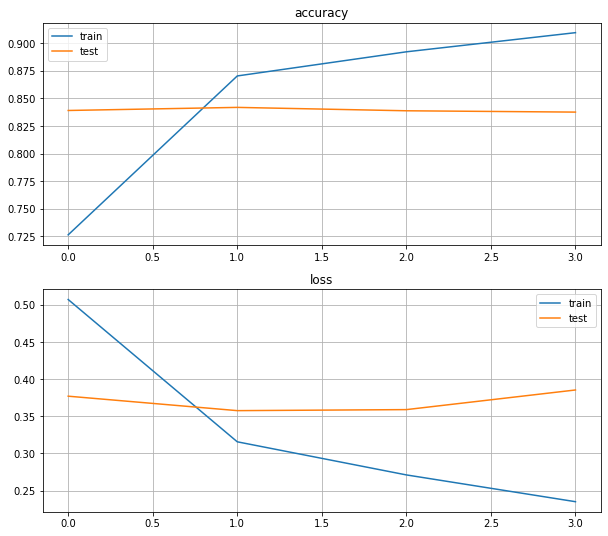

In [26]:
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

## Bidirectional RNN
- Bidirectional RNNs lee las secuencias en ambas direcciones



In [27]:
def bidirectional_lstm():
    
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(Bidirectional(LSTM(64, return_sequences = False))) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [28]:
model = bidirectional_lstm()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          256000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 322,177
Trainable params: 322,177
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Epoch 1/4
137/137 [==============================] - 35s 253ms/step - loss: 0.5087 - accuracy: 0.7275 - val_loss: 0.3876 - val_accuracy: 0.8261
Epoch 2/4
137/137 [==============================] - 34s 250ms/step - loss: 0.3207 - accuracy: 0.8661 - val_loss: 0.3556 - val_accuracy: 0.8409
Epoch 3/4
137/137 [==============================] - 34s 250ms/step - loss: 0.2763 - accuracy: 0.8904 - val_loss: 0.3604 - val_accuracy: 0.8440
Epoch 4/4
137/137 [==============================] - 35s 252ms/step - loss: 0.2447 - accuracy: 0.9049 - val_loss: 0.3695 - val_accuracy: 0.8441


In [30]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

782/782 - 17s - loss: 0.3747 - accuracy: 0.8414

Test acccuracy: 0.8414400219917297


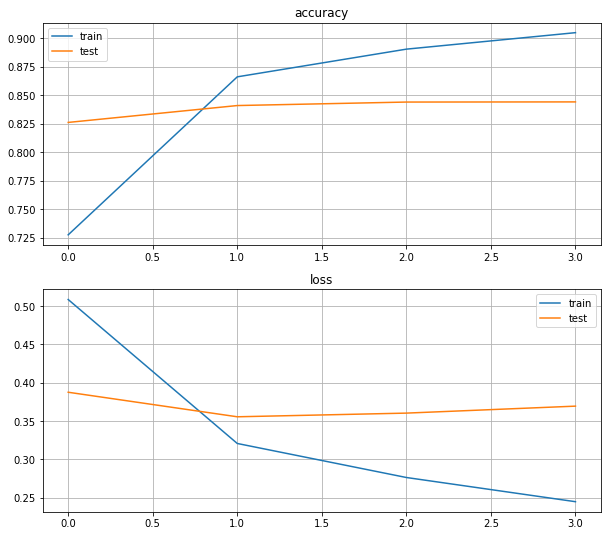

In [31]:
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

## Deep Bidirectional RNN
- Observar el efecto de la profundidad de la red en el entrenamiento

In [89]:
def deep_bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(Bidirectional(LSTM(64, return_sequences = True))) 
    model.add(Bidirectional(LSTM(64, return_sequences = False))) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [91]:
model = deep_bidirectional_lstm()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 64)          256000    
_________________________________________________________________
bidirectional_25 (Bidirectio (None, None, 128)         66048     
_________________________________________________________________
bidirectional_26 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 420,993
Trainable params: 420,993
Non-trainable params: 0
_________________________________________________________________


In [92]:
history1 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Epoch 1/4
137/137 [==============================] - 86s 625ms/step - loss: 0.4784 - accuracy: 0.7574 - val_loss: 0.3624 - val_accuracy: 0.8404
Epoch 2/4
137/137 [==============================] - 85s 624ms/step - loss: 0.3031 - accuracy: 0.8726 - val_loss: 0.3484 - val_accuracy: 0.8475
Epoch 3/4
137/137 [==============================] - 84s 616ms/step - loss: 0.2608 - accuracy: 0.8967 - val_loss: 0.3599 - val_accuracy: 0.8425
Epoch 4/4
137/137 [==============================] - 85s 618ms/step - loss: 0.2204 - accuracy: 0.9151 - val_loss: 0.3897 - val_accuracy: 0.8273


In [93]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

782/782 - 37s - loss: 0.3867 - accuracy: 0.8279

Test acccuracy: 0.8279200196266174


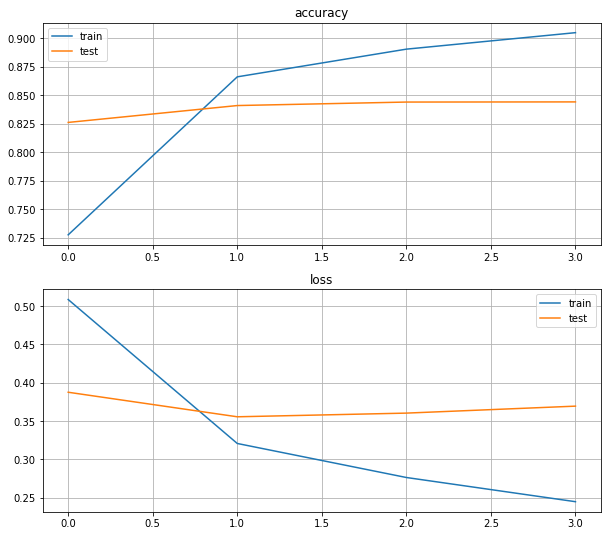

In [94]:
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'])
plt.grid()

## Optimización en Bidirectional RNN con regularización

- Los optimizadores tienen comportamientos diferentes en las distintas arquitecturas de redes
- La regularización como dropout se agrega con 'recurrent_dropout'

In [59]:
recurrent_dropout = 0.2

In [67]:
def deep_bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(Bidirectional(LSTM(64, return_sequences = True, 
                                 recurrent_initializer='glorot_uniform',
                                 recurrent_dropout=recurrent_dropout))) 
    model.add(Bidirectional(LSTM(64, return_sequences = False,
                                 recurrent_initializer='glorot_uniform',
                                 recurrent_dropout=recurrent_dropout))) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

In [68]:
model = deep_bidirectional_lstm()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 64)          256000    
_________________________________________________________________
bidirectional_17 (Bidirectio (None, None, 128)         66048     
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 420,993
Trainable params: 420,993
Non-trainable params: 0
_________________________________________________________________


In [69]:
history2 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Epoch 1/4
137/137 [==============================] - 126s 921ms/step - loss: 0.4895 - accuracy: 0.7605 - val_loss: 0.3585 - val_accuracy: 0.8380
Epoch 2/4
137/137 [==============================] - 131s 959ms/step - loss: 0.3334 - accuracy: 0.8597 - val_loss: 0.4074 - val_accuracy: 0.8429
Epoch 3/4
137/137 [==============================] - 126s 922ms/step - loss: 0.2902 - accuracy: 0.8829 - val_loss: 0.3598 - val_accuracy: 0.8404
Epoch 4/4
137/137 [==============================] - 125s 911ms/step - loss: 0.2667 - accuracy: 0.8931 - val_loss: 0.3527 - val_accuracy: 0.8524


In [70]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

782/782 - 47s - loss: 0.3590 - accuracy: 0.8500

Test acccuracy: 0.8500000238418579


- RMSProp con regularización supera a las redes anteriores con Adam 
- Averiguar si quitando la regularizacón se llega a el mismo resultado

In [71]:
def deep_bidirectional_lstm():
    model = Sequential()
    model.add(Embedding(num_words, emb_dim))
    model.add(Bidirectional(LSTM(64, return_sequences = True, 
                                 recurrent_initializer='glorot_uniform',
                                 recurrent_dropout=recurrent_dropout))) 
    model.add(Bidirectional(LSTM(64, return_sequences = False,
                                 recurrent_initializer='glorot_uniform',
                                 recurrent_dropout=recurrent_dropout))) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [72]:
model = deep_bidirectional_lstm()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 64)          256000    
_________________________________________________________________
bidirectional_19 (Bidirectio (None, None, 128)         66048     
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 420,993
Trainable params: 420,993
Non-trainable params: 0
_________________________________________________________________


In [73]:
history3 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Epoch 1/4
137/137 [==============================] - 126s 916ms/step - loss: 0.4711 - accuracy: 0.7595 - val_loss: 0.3554 - val_accuracy: 0.8460
Epoch 2/4
137/137 [==============================] - 129s 941ms/step - loss: 0.3026 - accuracy: 0.8779 - val_loss: 0.3483 - val_accuracy: 0.8472
Epoch 3/4
137/137 [==============================] - 125s 914ms/step - loss: 0.2541 - accuracy: 0.9001 - val_loss: 0.3573 - val_accuracy: 0.8432
Epoch 4/4
137/137 [==============================] - 125s 912ms/step - loss: 0.2019 - accuracy: 0.9245 - val_loss: 0.4030 - val_accuracy: 0.8424


In [74]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

782/782 - 47s - loss: 0.4126 - accuracy: 0.8361

Test acccuracy: 0.836080014705658


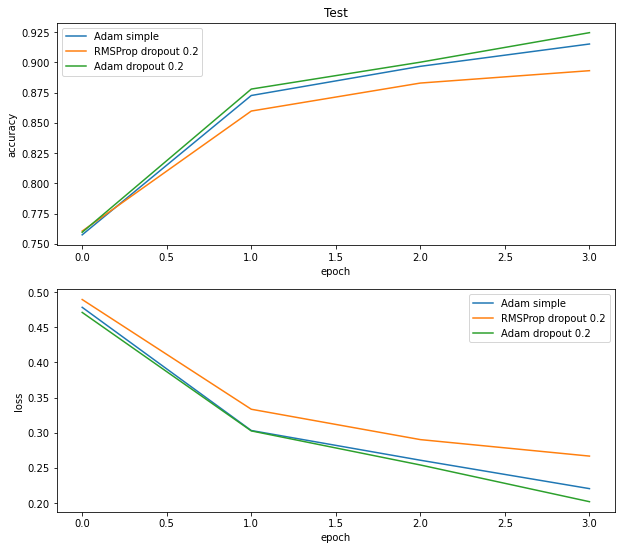

In [95]:
#plot
plt.figure(figsize=(10,9))
plt.subplot(211)

plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])

plt.legend(['Adam simple',
            'RMSProp dropout 0.2',
            'Adam dropout 0.2'])

plt.title('Test')
plt.ylabel('accuracy')
plt.xlabel('epoch')


plt.subplot(212)
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])

plt.legend(['Adam simple',
            'RMSProp dropout 0.2',
            'Adam dropout 0.2'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

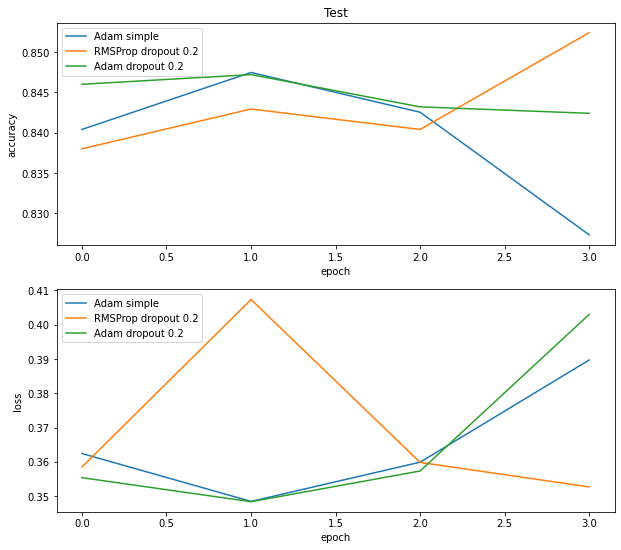

In [96]:
#plot
plt.figure(figsize=(10,9))
plt.subplot(211)

plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])

plt.legend(['Adam simple',
            'RMSProp dropout 0.2',
            'Adam dropout 0.2'])

plt.title('Test')
plt.ylabel('accuracy')
plt.xlabel('epoch')


plt.subplot(212)
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])

plt.legend(['Adam simple',
            'RMSProp dropout 0.2',
            'Adam dropout 0.2'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

- Mejorar el acuracy de la red
- Probar Deep-Bidirectional-RNN con otro dataset
- Probar con otros optimizadores y diferentes valores de 'recurrent_dropout' y 'recurrent_initializer' 